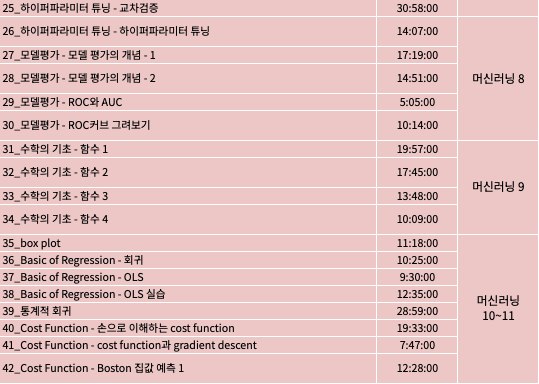

In [1]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from mlxtend.plotting import plot_decision_regions


import numpy as np
import pandas as pd

# 1. Basic of Regression

In [1]:
!pip install statsmodels

In [2]:
import pandas as pd

data = {"x": [1, 2, 3, 4, 5], "y": [1, 3, 4, 6, 5]}
df = pd.DataFrame(data)

df.head()

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


In [5]:
import statsmodels.formula.api as smf

# 가설 세우기
lm_model = smf.ols(formula="y ~ x", data=df).fit()

In [6]:
# 결과
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

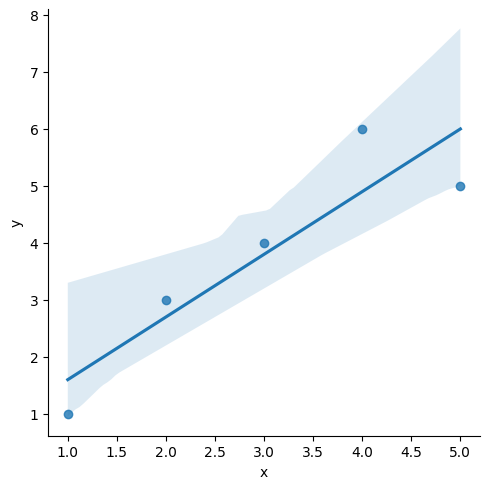

In [12]:
sns.lmplot(x="x",y="y", data=df)

## 📍 잔차 평가 - residue

In [13]:
resid = lm_model.resid

In [14]:
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

## 📍결정계수 - R-Squared

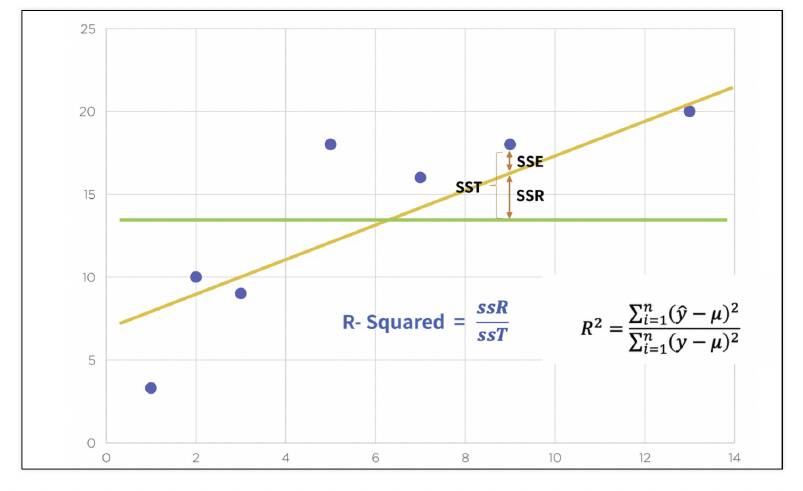

- y_hat은 예측된 값
- 예측 값과 실제 값(y)이 일치하면 결정계수는 1이 됨 (즉 결정계수가 높을 수록 좋은 모델)

In [15]:
import numpy as np

mu = np.mean(df.y)
y = df.y
yhat = lm_model.predict()
np.sum((yhat - mu)**2 / np.sum((y - mu)**2))

0.8175675675675685

In [17]:
lm_model.rsquared

0.8175675675675675

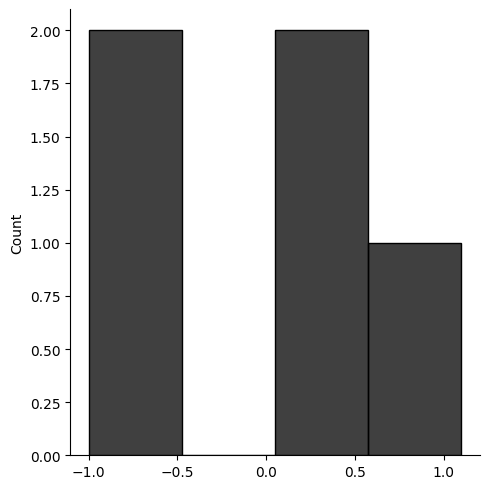

In [18]:
sns.displot(resid, color="black")

# 2. 통계적 회귀

In [20]:
data_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv"
data = pd.read_csv(data_url)

In [22]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [24]:
data.drop(["Email", "Address", "Avatar"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<Axes: >

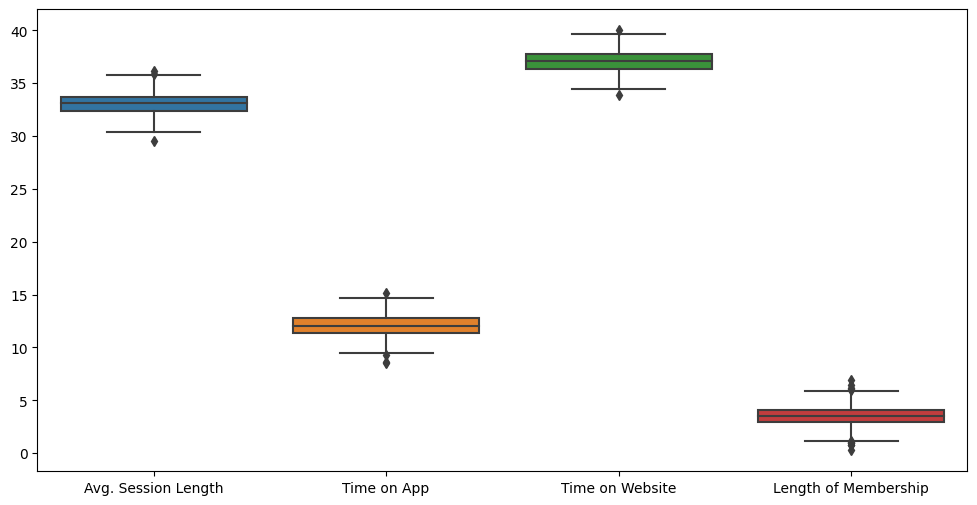

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :-1])

<Axes: >

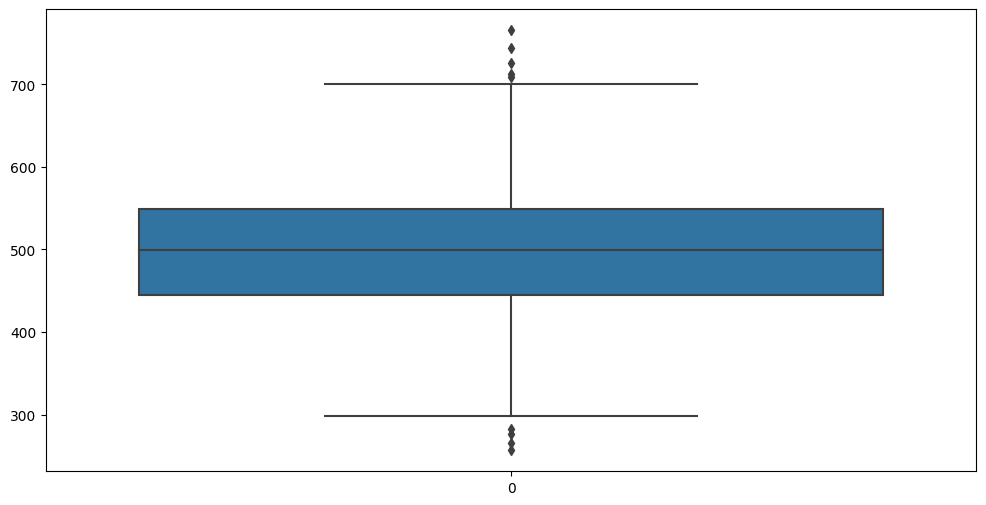

In [28]:
# Label 값에 대한 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Yearly Amount Spent"])

<Figure size 1200x600 with 0 Axes>

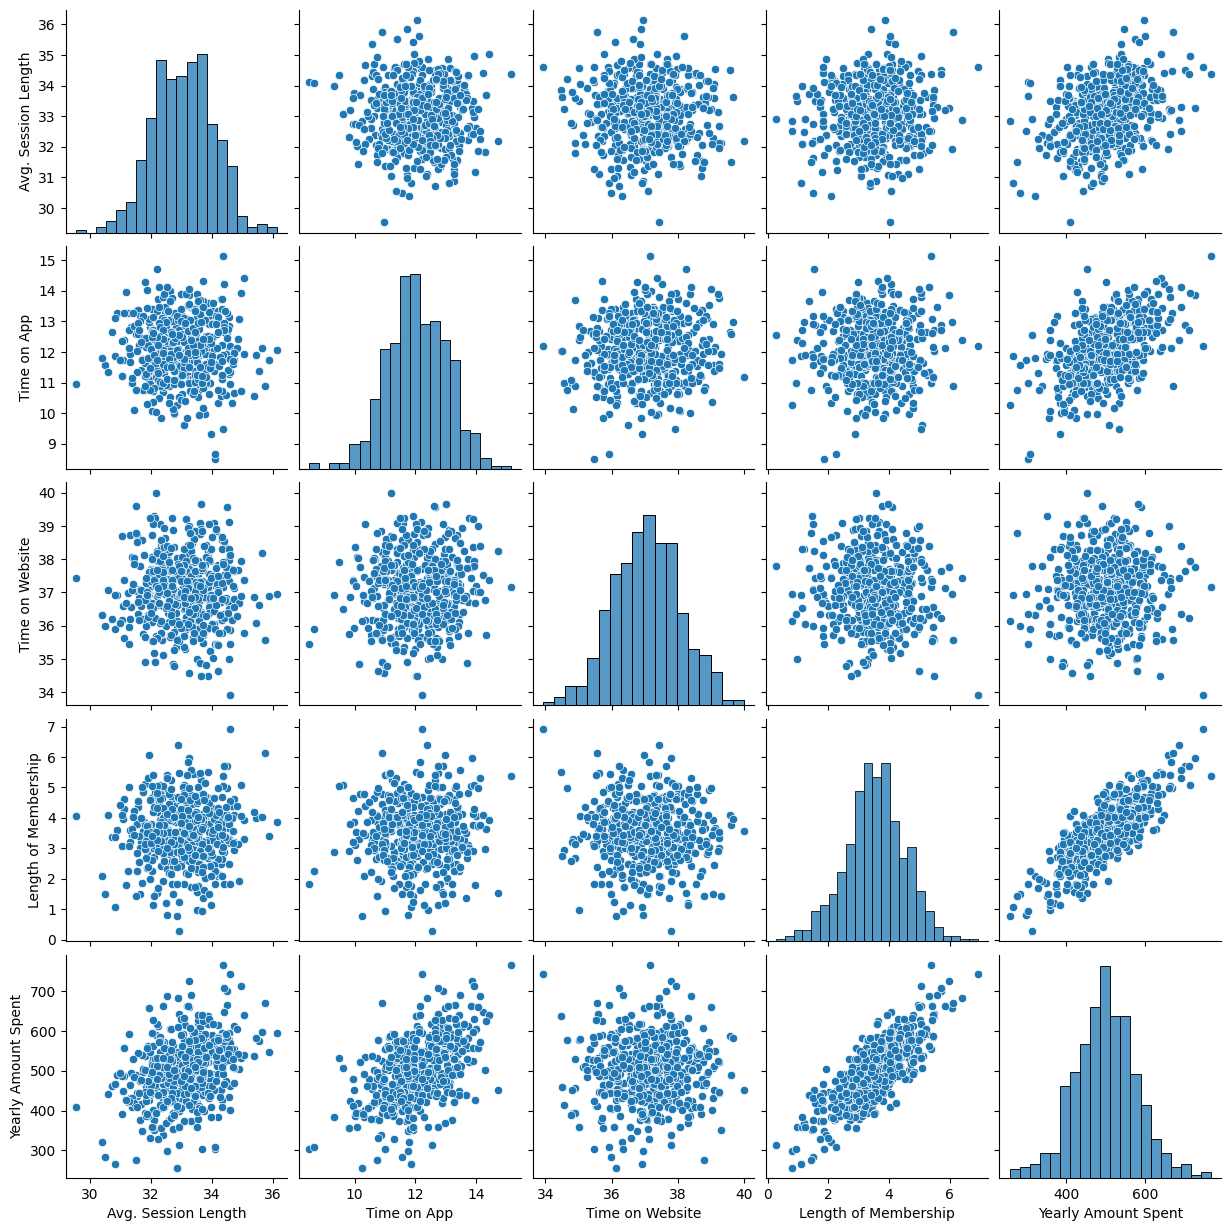

In [29]:
# pairplot으로 경향 확인
plt.figure(figsize=(12, 6))
sns.pairplot(data=data)

<Figure size 1200x600 with 0 Axes>

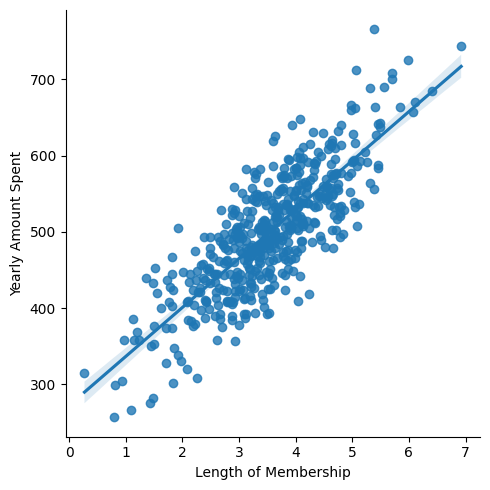

In [33]:
plt.figure(figsize=(12, 6))
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=data)

## 📍상관이 높은 멤버쉽 유지기간만 가지고 통계적 회귀

In [35]:
import statsmodels.api as sm

X = data["Length of Membership"]
y = data["Yearly Amount Spent"]
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Fri, 22 Sep 2023   Prob (F-statistic):                        0.00
Time:                         22:50:57   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 좀 더 수치의 의미를 해석

- R-squared : 모형 적합도, y의 분산을 각각의 변수들이 약 99.8%로 설명할 수 있음
- Adj. R-squared : 독립변수가 여러 개인 다중회귀분석에서 사용
- Prob. F-Statistic : 회귀모형에 대한 통계적 유의미성 검정.
이 값이 0.05 이하라면 모집단에서도 의미가 있다고 볼 수 있음

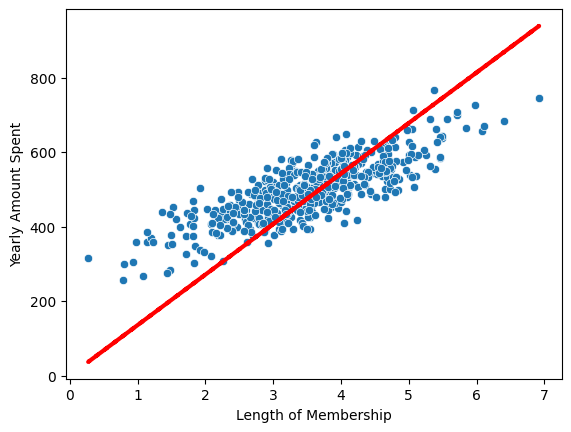

In [38]:
pred = lm.predict(X)

sns.scatterplot(x=X, y=y)
plt.plot(X, pred, "r", ls="dashed", lw=3)

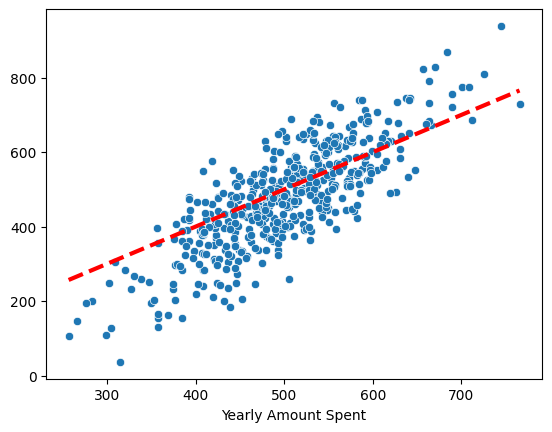

In [41]:
sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)], [min(y), max(y)] , "r", ls="dashed", lw=3)

(0.0, 765.5184619388373, 0.0, 765.5184619388373)

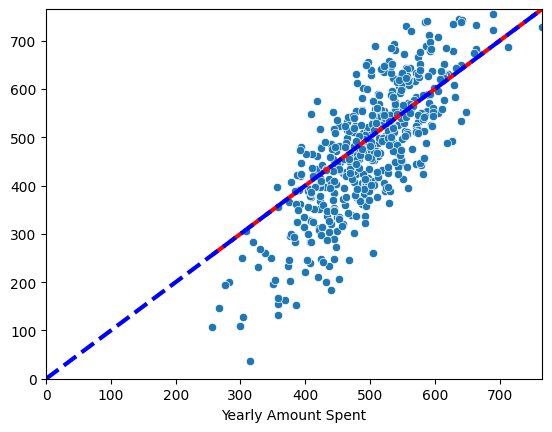

In [42]:
# 상수항이 없어서
sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)], [min(y), max(y)] , "r", ls="dashed", lw=3)
plt.plot([0, max(y)], [0, max(y)], "b", ls="dashed", lw=3)
plt.axis([0, max(y),0,max(y)])

In [43]:
# 상수항을 넣자
X = np.c_[X, [1] * len(X)]
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [44]:
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Fri, 22 Sep 2023   Prob (F-statistic):          4.81e-117
Time:                         23:15:00   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

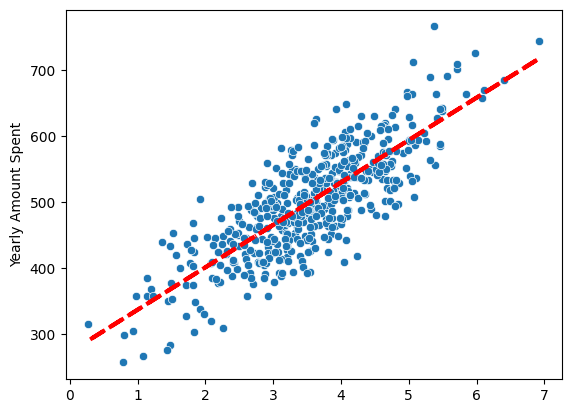

In [45]:
# 선형 회귀 결과
pred = lm.predict(X)

sns.scatterplot(x=X[:, 0 ], y=y)
plt.plot(X[:, 0], pred, "r", ls="dashed", lw=3)

# 3. Cost Function